## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
# option so we can always see all columns
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('unit4_partially_processed.csv') 
data.head()

,STATE,DOB,MDMAUD,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,IC2_
0,IL,3712,XXXX,F,T2,3.878257,,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,4.0,7.741935,Low
1,CA,5202,XXXX,M,S1,6.000000,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,18.0,15.666667,High
2,NC,0,XXXX,M,R2,3.000000,U,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,12.0,7.481481,Low
3,CA,2801,XXXX,F,R2,1.000000,U,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,9.0,6.812500,Moderate
4,FL,2001,XXXX,F,S2,3.000000,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,14.0,6.864865,Low


## EDA and plots - would be done here - before you start feature engineering

In [7]:
data.shape

(90569, 26)

### Feature engineering - a few more examples

Feature Engineering (also called wrangling or pre-proceessing) is transforming the given data into a form that is easier for the ML model to interpret. This is generally speaking also the view that is easier for you to interpret ! 


In [3]:
len(data[data['DOB'] == 0])

22507

What do we want from the age anyway?
Year of birth is probably the relevant data + will want to bin these years or turn them into categories. 
Here is two ways to do it: 

NOTE : In the DOB column, the format is YYMM. We will use this info to get the year when they were born.

In [8]:
def year(x):
  x =str(x)
  if (len(x) < 4):
    return np.nan
  else:
    return int(x[:2])

In [9]:
import re
def year(x):
    x = str(x)
    if len(x)<4:
        return np.nan
    else:
        pattern = '\d\d'
        yr = re.findall(pattern,x)[0]
        return int(yr)

NOTE : our reference year is 1997 because the data is from a 1997 study.

In [10]:
data['year'] = list(map(year, data['DOB']))
data['age'] = 97 - data['year']#97 is the yearw data was collected - so age = 97 - DOB

data['age'] = data['age'].fillna(np.mean(data['age']))

In [11]:
# Now we can drop the column DOB as we have extracted the information we need from this column
data = data.drop(['DOB'], axis=1)
data = data.drop(['year'], axis=1)

In [12]:
data.head()

,STATE,MDMAUD,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT,IC2_,age
0,IL,XXXX,F,T2,3.878257,,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,L4E,31,4.0,7.741935,Low,60.00000
1,CA,XXXX,M,S1,6.000000,H,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,L2G,3,18.0,15.666667,High,45.00000
2,NC,XXXX,M,R2,3.000000,U,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,L4E,27,12.0,7.481481,Low,59.51171
3,CA,XXXX,F,R2,1.000000,U,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,L4E,16,9.0,6.812500,Moderate,69.00000
4,FL,XXXX,F,S2,3.000000,H,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,L2F,37,14.0,6.864865,Low,77.00000


### Problem: lots of zeros in Age
- So a quarter of all rows in age are zeros. 
- We could just delete them but then we lose a lot of data.
- Could take the mean but that would badly skew the data. 

We have many more opotions than just replacing them with mean or mode. Can get functions and algorithums to predict the misssing values. - Run Machine learning to predict the missing ages. -> as a preprocessing step
https://towardsdatascience.com/how-to-deal-with-missing-data-in-python-1f74a9112d93

(ML will probably map out likely ages to the other factors (are they home owners etc) and extrapolate.)

### Feature selection- the challenge : which columns should we keep for our model?

- tip 1 - check null values to drop a column 
So if your 80% nulls. You are going to drop the data
- tip 2 - sense check which columns are likely to be useful to answer the question at hand... 
Go back to basics - what would you choose if you were trying to predict a doantion amount ?
- tip 3 - check multicollinearity for numerical variables using correlation/ heat maps etc 
Scatter plots. Heat maps. Pull into tableau and play 

Things you can do : (your notes here)

- plots
- correlation matrix heat map
- create a data frame of null percentages?
- value counts
- DISCUSS! with your team mates
- pair plot





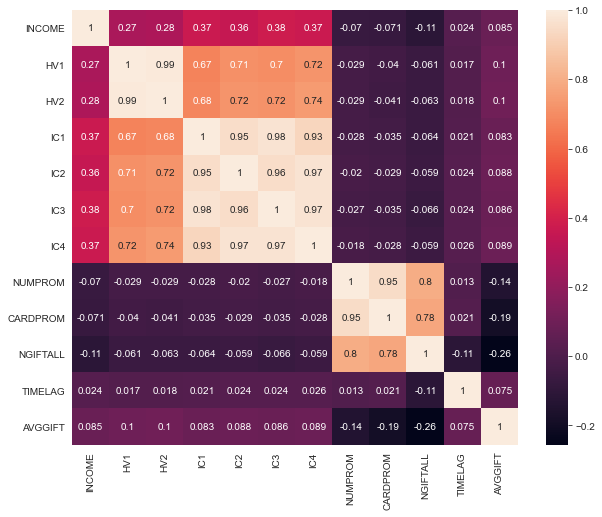

In [13]:
# corrrelation matrix 
data_corr = data[['INCOME', 'HV1', 'HV2', 'IC1', 'IC2', 'IC3', 'IC4', 'NUMPROM', 'CARDPROM', 'NGIFTALL', 'TIMELAG', 'AVGGIFT']]
corr_matrix=data_corr.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

### why is multi collinearity a problem for linear regression ? 

Your notes here : 

- If the data correlates too well then it effectively is the same column twice - so it gives that trend too much weight
- more columns . more noise 
- 


### How does the correlation matrix help ? 

Your notes here : 

- We can look for the lighter boxes above. 
- Summarises all the realtionships between NUMERIC variations in one place. 
- 



In [ ]:
corr_matrix # numeric less colourful version

### what can you see? do we need to investigate further ? 

what can we do to confirm the correlation? 

your notes here : 

- Plot them next to each other
- look for nulls of those two variables
- 


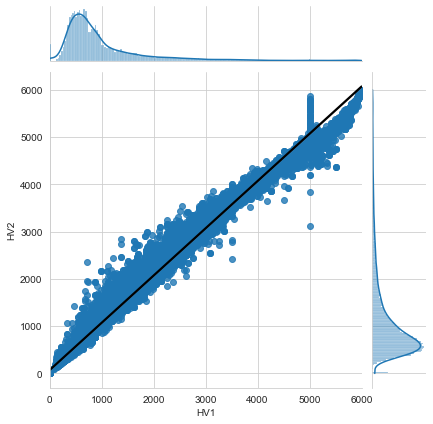

In [14]:
sns.jointplot(x="HV1", y="HV2", data=data_corr, kind='reg',joint_kws={'line_kws':{'color':'black'}})


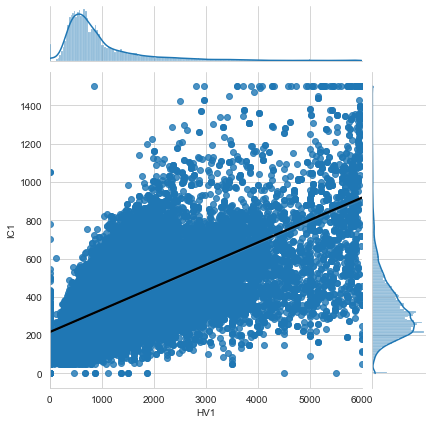

In [15]:
sns.jointplot(x="HV1", y="IC1", data=data_corr, kind='reg',joint_kws={'line_kws':{'color':'black'}})

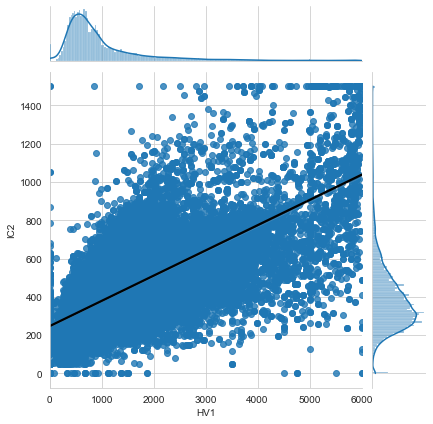

In [16]:
sns.jointplot(x="HV1", y="IC2", data=data_corr, kind='reg',joint_kws={'line_kws':{'color':'black'}})

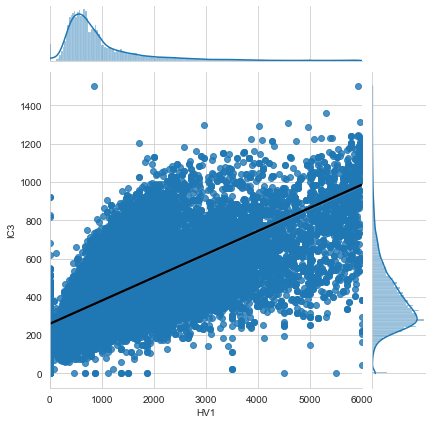

In [17]:
sns.jointplot(x="HV1", y="IC3", data=data_corr, kind='reg',joint_kws={'line_kws':{'color':'black'}})

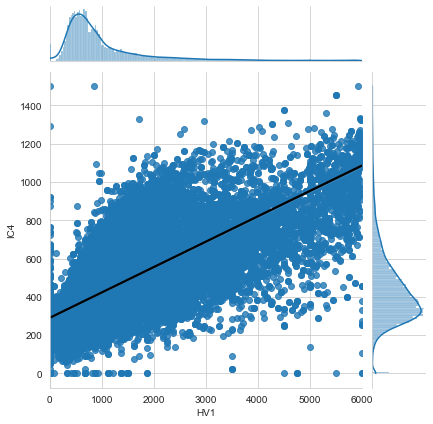

In [18]:
sns.jointplot(x="HV1", y="IC4", data=data_corr, kind='reg',joint_kws={'line_kws':{'color':'black'}})

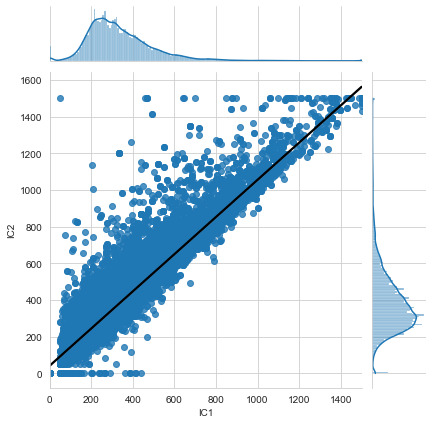

In [19]:
sns.jointplot(x="IC1", y="IC2", data=data_corr, kind='reg',joint_kws={'line_kws':{'color':'black'}})

### what if anything has this revealed ? Can we drop some features at this stage? 

your notes here : 

- 
- 
- 



#### what about calculating a line of best fit using linear regression, between two variables ? 

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score



### what is r2 score? and can I 100% rely on it?
https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit

your notes here : 

- 
- 
- 



### what is VIF? 
https://www.statisticshowto.com/variance-inflation-factor/

your notes here : 

- 
- 
- 



In [22]:
model = LinearRegression().fit(data_corr[['HV1']], data_corr[['HV2']])
model_r2 = model.score(data_corr[['HV1']], data_corr[['HV2']])
model_vif = 1/(1-model_r2)
print("The R2 of the model is: %5.3f" % (model_r2))
print("The VIF of the model is: %5.3f" % (model_vif))

The R2 of the model is: 0.987
The VIF of the model is: 75.446


In [23]:
model = LinearRegression().fit(data_corr[['IC1']], data_corr[['IC2']])
model_r2 = model.score(data_corr[['IC1']], data_corr[['IC2']])
model_vif = 1/(1-model_r2)
print("The R2 of the model is: %5.3f" % (model_r2))
print("The VIF of the model is: %5.3f" % (model_vif))

The R2 of the model is: 0.905
The VIF of the model is: 10.497


#### Let's see how we can automate some feature selection based on VIF.

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [25]:
data_corr.shape

(90569, 12)

NOTE: before using these techniques you must ensure there are no Nulls or NANs in my data - as these functions cannot handle missing values 

In [ ]:
data_corr.isnull().sum().sort_values(ascending=False)

As we can see there are loads of missing values in timelag. we have been through various methods to interpolate, predict, or drop these values already. 
Lets use the simple replace with mean technique for this exercise

In [ ]:
data_corr.fillna(data_corr.mean(), inplace=True)


In [ ]:
#remember to check this has worked as expected 

In [ ]:
# VIF function: 
# We are using add_constant here as the VIF method in python expects the addition of a constant terms in the X features.
# (namely the intercept term). It uses OLS but does not add the constant itself. 

vif = {}
data_corr = add_constant(data_corr)
#data_corr

for i in np.arange(data_corr.shape[1]):
    column_name = data_corr.columns[i]
    value = variance_inflation_factor(np.array(data_corr), i)
    vif[column_name] = value


In [ ]:
# Code to use the variance_inflation_factor technique to remove highly correlated columns

flag = True
threshold = 50
data_corr = add_constant(data_corr)
while flag is True:
    #print(data_corr.head())
    flag = False
    values = [variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]
    #print(values)
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = data_corr.columns[col_index]
        data_corr = data_corr.drop([column_name], axis=1)
        flag = True

#### Summary re effects of Multicollinearity:

Your Notes here 

-

-

-



# Activity

Comparing the VIF method and the correlation matrix to perform feature selection.

Do you think it is better to use VIF or correlation matrix threshold for feature selection? 

In [ ]:
# using corr

flag= True
while flag is True:
    flag = False
    for i in range(1, corr_matrix.shape[1]):
        if corr_matrix.iloc[i,range(i)].max() > 0.9:
            print(corr_matrix.columns[corr_matrix.iloc[i,range(i)].argmax()])
            col_name = corr_matrix.columns[corr_matrix.iloc[i,range(i)].argmax()]
            corr_matrix.drop([col_name], axis=1, inplace=True)
            corr_matrix.drop([col_name], inplace=True)

            flag = True
            break

print(corr_matrix.columns)

In [ ]:
# using VIF

flag = True
threshold = 50
data_corr = add_constant(data_corr)
while flag is True:
    #print(data_corr.head())
    flag = False
    values = [variance_inflation_factor(np.array(data_corr), i) for i in np.arange(data_corr.shape[1])]
    #print(values)
    if max(values)> threshold:
        col_index = values.index(max(values))
        column_name = data_corr.columns[col_index]
        data_corr = data_corr.drop([column_name], axis=1)
        flag = True

print(data_corr.columns)

### Chi-square tests for independence of categorical variables

Your notes here : 

- 
-
-
 

https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223

In [ ]:
data_crosstab = pd.crosstab(data['DOMAIN'], data['RFA_2'], margins = False)
data_crosstab

What did the contingency table show ? 

your notes here 

- 
-
- 

H0 (Null Hypothesis) - assumes that there is no association between the two variables.

Ha (Alternate Hypothesis) - assumes that there is an association between the two variables. 

#### What are the three important values that we measure in order to calculate the Chi-square test statistic?

Your notes here: 
    
    - 
    - 
    - 

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(data_crosstab, correction=False)


#### What did you learn using the chi squared test and are there any further columns/features we could drop at this stage ? 

Your notes here : 

-
-
-